In [1]:
import os
os.chdir(r'C:\Users\lanmo\OneDrive\Документы\titanic')
import pandas as pd
import matplotlib.pyplot as plt
data_train = pd.read_csv('train.csv')
import numpy as np
import seaborn as sns
np.random.seed(123)

In [2]:
data_test = pd.read_csv('test.csv')

In [3]:
data_train.drop_duplicates(inplace = True)

In [4]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
merge = pd.concat([data_train,data_test],axis = 0)

In [6]:
merge.drop('PassengerId',inplace = True,axis = 1)

In [7]:
merge.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
merge.describe(exclude = 'number')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [9]:
merge.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [10]:
merge.drop('Cabin',inplace = True,axis = 1)

<Axes: >

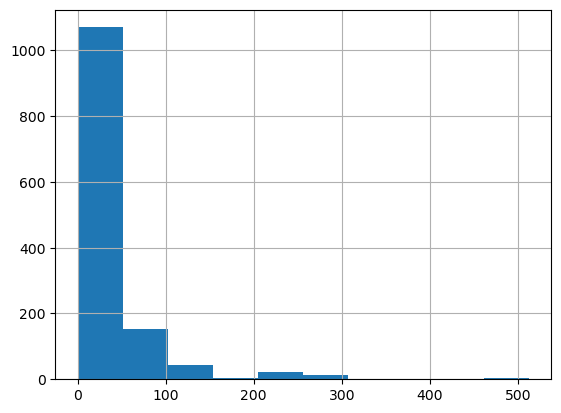

In [11]:
merge['Fare'].hist()

<Axes: >

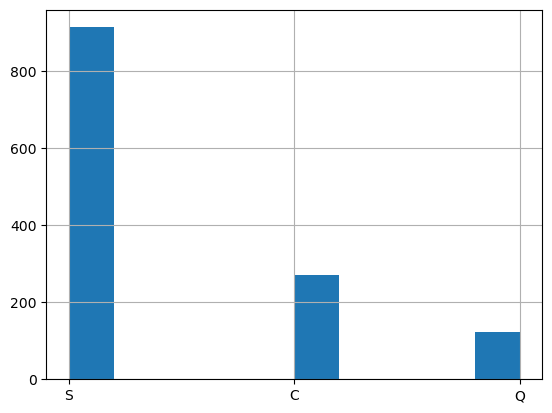

In [12]:
merge['Embarked'].hist()

In [13]:
merge[merge['Embarked'].isna()] = merge[merge['Embarked'].isna()].fillna('S')
median = merge['Fare'].median()
merge.loc[merge['Fare'].isna(),'Fare'] = median

In [14]:
merge.isna().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [15]:
merge[merge['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
408,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
410,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
413,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
416,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [16]:
merge[merge['Age'].notna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
409,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


In [17]:
merge['megdom'] = merge['Name'].str.extract(r',\s*([^,\.]+)\s*\.')

In [18]:
def vid(x):
    if x in ['Mr','Mrs','Miss','Master']:
        return x
    else:
        return 'Other'

In [19]:
merge['megdom'] = merge['megdom'].apply(vid)

<Axes: >

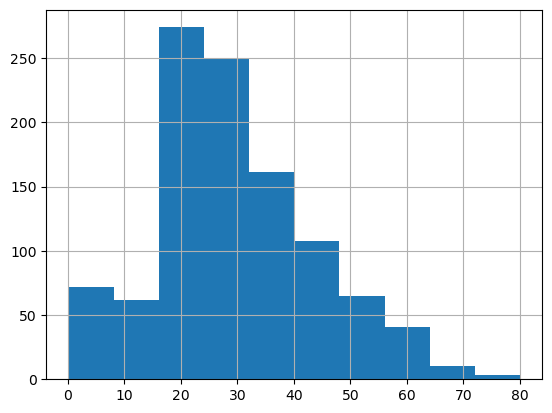

In [20]:
merge['Age'].hist()

In [21]:
mean_a = merge['Age'].mean()
std_a = merge['Age'].std()

In [22]:
age_null_count = merge['Age'].isnull().sum()
age_null_random_list = np.random.randint(mean_a - std_a, mean_a + std_a, size=age_null_count)
merge['Age'][np.isnan(merge['Age'])] = age_null_random_list
merge['Age'] = merge['Age'].astype(int)
merge['CategoricalAge'] = pd.cut(merge['Age'], 5)

C:\Users\lanmo\AppData\Local\Temp\ipykernel_11592\2064351861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['Age'][np.isnan(merge['Age'])] = age_null_random_list


In [23]:
merge

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,megdom,CategoricalAge
0,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr,"(16.0, 32.0]"
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs,"(32.0, 48.0]"
2,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss,"(16.0, 32.0]"
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs,"(32.0, 48.0]"
4,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,19,0,0,A.5. 3236,8.0500,S,Mr,"(16.0, 32.0]"
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,Other,"(32.0, 48.0]"
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,"(32.0, 48.0]"
416,NaN,3,"Ware, Mr. Frederick",male,19,0,0,359309,8.0500,S,Mr,"(16.0, 32.0]"


In [24]:
merge.loc[ merge['Age'] <= 16, 'Age'] = 0
merge.loc[(merge['Age'] > 16) & (merge['Age'] <= 32), 'Age'] = 1
merge.loc[(merge['Age'] > 32) & (merge['Age'] <= 48), 'Age'] = 2
merge.loc[(merge['Age'] > 48) & (merge['Age'] <= 64), 'Age'] = 3
merge.loc[ merge['Age'] > 64, 'Age'] = 4 ;

In [25]:
merge.drop(['Name','CategoricalAge'],axis = 1,inplace = True)

In [26]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   int32  
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
 9   megdom    1309 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 107.4+ KB


In [27]:
merge['family'] = merge['SibSp'] + merge['Parch'] + 1

In [28]:
merge.drop(['SibSp','Parch','Ticket'],inplace = True,axis = 1)

In [29]:
merge[['Pclass','family']] = merge[['Pclass','family']].astype(str)

In [30]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   int32  
 4   Fare      1309 non-null   float64
 5   Embarked  1309 non-null   object 
 6   megdom    1309 non-null   object 
 7   family    1309 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 86.9+ KB


In [31]:
merge['Fare'] = (merge['Fare'] - merge['Fare'].mean()) / merge['Fare'].std()

In [32]:
merge

,Survived,Pclass,Sex,Age,Fare,Embarked,megdom,family
0,0.0,3,male,1,-0.503099,S,Mr,2
1,1.0,1,female,2,0.734463,C,Mrs,2
2,1.0,3,female,1,-0.490053,S,Miss,1
3,1.0,1,female,2,0.383037,S,Mrs,2
4,0.0,3,male,2,-0.487637,S,Mr,1
...,...,...,...,...,...,...,...,...
413,NaN,3,male,1,-0.487637,S,Mr,1
414,NaN,1,female,2,1.461475,C,Other,1
415,NaN,3,male,2,-0.503099,S,Mr,1
416,NaN,3,male,1,-0.487637,S,Mr,1


In [33]:
merge = pd.get_dummies(merge,columns = ['Pclass','Sex','Age','Embarked','megdom','family'],dtype = int,drop_first =True)

In [34]:
X = merge.dropna().drop('Survived',axis =1)
y=merge.dropna()['Survived']
test = merge[merge['Survived'].isna()]

In [35]:
test

,Survived,Fare,Pclass_2,Pclass_3,Sex_male,Age_1,Age_2,Age_3,Age_4,Embarked_Q,...,megdom_Mrs,megdom_Other,family_11,family_2,family_3,family_4,family_5,family_6,family_7,family_8
0,NaN,-0.491905,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,NaN,-0.507930,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,NaN,-0.455990,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,NaN,-0.475800,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,-0.405740,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,-0.487637,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,NaN,1.461475,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
415,NaN,-0.503099,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,NaN,-0.487637,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(max_depth = 2,)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3b2127d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3b1e37050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3b21084d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1c3b2135390>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c3abbd1a50>,
 'means': []}

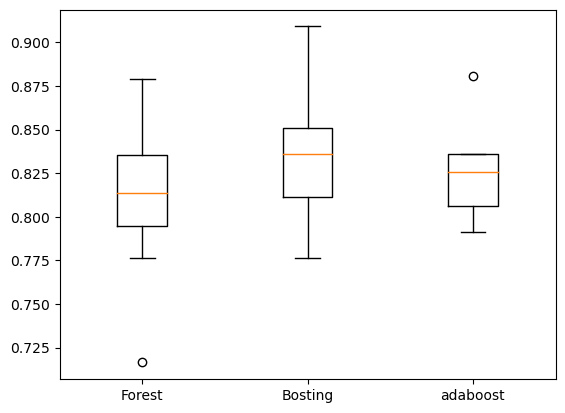

In [39]:
dt = DecisionTreeClassifier(max_depth =2)
models = [
    ('Forest',RandomForestClassifier()),
    ('Bosting',GradientBoostingClassifier()),
    ('adaboost',AdaBoostClassifier())
]
scores = {}
for name,model in models:
    score = cross_val_score(model,X_train,y_train,cv =10)
    scores[name]=score
fig, ax = plt.subplots()

# Данные для boxplot
data_values = list(scores.values())
labels = list(scores.keys())

# Рисуем boxplot
ax.boxplot(data_values, labels=labels)

In [40]:
rf = RandomForestClassifier()
rf.fit(X,y)
mask = rf.feature_importances_
X.iloc[:,mask>0.05]

,Fare,Pclass_3,Sex_male,megdom_Mr
0,-0.503099,1,1,1
1,0.734463,0,0,0
2,-0.490053,1,0,0
3,0.383037,0,0,0
4,-0.487637,1,1,1
...,...,...,...,...
886,-0.391969,0,1,0
887,-0.063413,0,0,0
888,-0.190004,1,0,0
889,-0.063413,0,1,1


In [41]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=5,step =1, verbose = 1)
rfe.fit(X,y)

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=5, verbose=1)

In [42]:
X_bolv = X[X.columns[rfe.support_]]
test = test[X.columns[rfe.support_]]
X_bolv

,Fare,Pclass_3,Sex_male,megdom_Mr,megdom_Mrs
0,-0.503099,1,1,1,0
1,0.734463,0,0,0,1
2,-0.490053,1,0,0,0
3,0.383037,0,0,0,1
4,-0.487637,1,1,1,0
...,...,...,...,...,...
886,-0.391969,0,1,0,0
887,-0.063413,0,0,0,0
888,-0.190004,1,0,0,0
889,-0.063413,0,1,1,0


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_bolv,y)

In [44]:
boost = GradientBoostingClassifier()
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':range(1,4),
    'min_samples_leaf':np.arange(0.2,1,0.2),
    'learning_rate':np.arange(0.2,1,0.2),
    'n_estimators': range(50,200,10),
    'subsample':np.arange(0.2,1,0.2),
}

In [45]:
rand= GridSearchCV(boost,params,n_jobs=-1,cv =5)

In [46]:
rand.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.2, 0.4, 0.6, 0.8]),
                         'max_depth': range(1, 4),
                         'min_samples_leaf': array([0.2, 0.4, 0.6, 0.8]),
                         'n_estimators': range(50, 200, 10),
                         'subsample': array([0.2, 0.4, 0.6, 0.8])})

In [47]:
rand.best_score_

0.8218606217035124

In [48]:
rand.best_params_

{'learning_rate': 0.8,
 'max_depth': 2,
 'min_samples_leaf': 0.2,
 'n_estimators': 190,
 'subsample': 0.8}

In [49]:
model = rand.best_estimator_

In [51]:
model.score(X_test,y_test)

0.8430493273542601

In [54]:
test

,Fare,Pclass_3,Sex_male,megdom_Mr,megdom_Mrs
0,-0.491905,1,1,1,0
1,-0.507930,1,0,0,1
2,-0.455990,0,1,1,0
3,-0.475800,1,1,1,0
4,-0.405740,1,0,0,1
...,...,...,...,...,...
413,-0.487637,1,1,1,0
414,1.461475,0,0,0,0
415,-0.503099,1,1,1,0
416,-0.487637,1,1,1,0


In [55]:
y_pred = model.predict(test)

In [56]:
y_pred.sum()

151.0

In [57]:
prim = pd.read_csv('gender_submission.csv',index_col = 0)

In [58]:
prim

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [59]:
prim['Survived'] = y_pred

In [60]:
prim['Survived'] = prim['Survived'].astype(int)

In [61]:
prim

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [62]:
prim.to_csv('predscas.csv')